<a href="https://colab.research.google.com/github/ttu1984wei/Calculus/blob/main/20220704_eWant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import pandas as pd

###普朗克黑體輻射函數

$$ u(\lambda ,T)={\frac {8 \pi h c}{\lambda ^{5}}}\left(e^{\frac {hc}{\lambda K_B T}}-1\right)^{-1}$$
其中$\lambda$波長、$T$黑體溫度、 $h$普朗克常數、 $c$光速、 $K_B$波茲曼常數

In [ ]:
def f(x):
    KB = 1.38*10**(-23)
    c = 3*10**8
    h = 6.626*10**(-34)
    N = 4000
    Li = (100 + 2400*x/N)*10**(-9)
    T = 4000
    return (8 *  np.pi *h * c)/(Li**5*(np.exp(h*c/(T*Li*KB)) - 1))


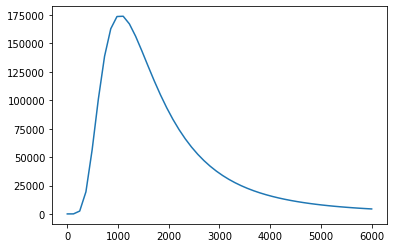

In [ ]:
x = np.linspace(0, 6000)
plt.plot(x, f(x))
plt.show()

以黑體輻射函數為例，了解黎曼和

黎曼積分基本公式
$$\int_a^b f(x)dx = \lim_{x \rightarrow \infty} \sum_{i=1}^n f(\alpha_i) \Delta x_i,\ 其中 \alpha_i \in [x_{i-1}, x_i],\ \Delta x_i=x_i - x_{i-1}$$

這次圖形以上下和方式呈現，藍色代表上和，紅色代表下和

In [ ]:
def N(Ni):
    a1=0
    b1=8000
    x = np.linspace(a1,b1,Ni+1)
    y = f(x)
    plt.figure(figsize=(20,5))

    #上和
    for i in range(0,Ni+1,1):
        if f(x[i-1]) < f(x[i]):
            xm = x[i]
            xc= x[i]-(x[i]-x[i-1])/2
            ym = f(xm)
            plt.plot(x,y,'b') 
            plt.plot(xm,ym,'b.',markersize=10)
            plt.bar(xc,ym,width=(b1-a1)/Ni,alpha=0.1, color="blue",edgecolor='b')
        elif f(x[i-1]) > f(x[i]):
            xm = x[i-1]
            xc= x[i]-(x[i]-x[i-1])/2
            ym = f(xm)
            plt.plot(x,y,'b') 
            plt.plot(xm,ym,'b.',markersize=10)
            plt.bar(xc,ym,width=(b1-a1)/Ni,alpha=0.1, color="blue",edgecolor='b')  
        else:
            print('哭') 
    #下和             
    for j in range(0,Ni+1,1):
        if f(x[j-1]) < f(x[j]):
            xs = x[j-1]
            xc= x[j]-(x[j]-x[j-1])/2
            ys = f(xs)
            plt.plot(x,y,'r') 
            plt.plot(xs,ys,'r.',markersize=10)
            plt.bar(xc,ys,width=(b1-a1)/Ni,alpha=0.1, color="red",edgecolor='r')
        elif f(x[j-1]) > f(x[j]):
            xs = x[j-1]
            xc= x[j-1]-(x[j]-x[j-1])/2
            ys = f(xs)
            plt.plot(x,y,'r') 
            plt.plot(xs,ys,'r.',markersize=10)
            plt.bar(xc,ys,width=(b1-a1)/Ni,alpha=0.1, color="blue",edgecolor='b') 
        else:
            print('哭')
    plt.title('Upper and Lower Riemann Sum, N = {}'.format(Ni))
    plt.show()
int_plot = interact(N ,Ni = (3,100),step =1000)
int_plot

interactive(children=(IntSlider(value=51, description='Ni', min=3), Output()), _dom_classes=('widget-interact'…

<function __main__.N>

這圖形代表著普朗克定律描述的黑體輻射在4000K、5000K、6000K溫度下的頻譜

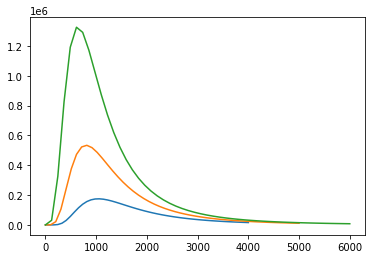

In [ ]:
KB = 1.38*10**(-23)
c = 3*10**8
h = 6.626*10**(-34)
N = 4000
for i in range(4000, 7000, 1000):
    i_lin = np.linspace(0, i)
    Ti = i
    Li = (100 + 2400*i_lin/N)*10**(-9)
    bbr = (8 *  np.pi *h * c)/(Li**5*(np.exp(h*c/(Ti*Li*KB)) - 1))
    plt.plot(i_lin, bbr)

plt.show()

以6000K為基礎線，看不同溫度下的峰值變化

In [ ]:
def bbr(K5=0): 
    i5 = np.linspace(0, 10000, 10000)
    i6 = np.linspace(0, 6000)
    L5 = (100 + 2400*i5/4000)*10**(-9)
    L6 = (100 + 2400*i6/4000)*10**(-9)
    f5 = (8 *  np.pi *h * c)/((L5**5) *(np.exp(h*c/(K5*L5*KB)) - 1))
    f6 = (8 *  np.pi *h * c)/((L6**5) *(np.exp(h*c/(6000*L6*KB)) - 1))
    plt.plot(i5, f5)
    plt.plot(i6, f6)
    plt.show()

interact(bbr, K5=(4000., 6000.))

interactive(children=(FloatSlider(value=4000.0, description='K5', max=6000.0, min=4000.0), Output()), _dom_cla…

<function __main__.bbr>